In [1]:
import pandas
import matplotlib.pyplot as plt
#import csv
#from nltk.book import *

In [5]:
f = open('View_AllData.data.sql', 'r')
str = f.read().split(',')
headerNames = [i.replace('[', "").replace(']', '').replace(' ', '').replace('\'', '') for i in str]
headerNames

IOError: [Errno 2] No such file or directory: 'View_AllData.data.sql'

In [3]:
df = pandas.read_csv("outputView_AllData.csv", low_memory=False, nrows=30999,names=headerNames)
df.head()

NameError: name 'headerNames' is not defined

In [4]:
df1 = df[['INF_Data@StartTime_DT', 'INF_Data@CommentTech_STR']]
df2={}
for col in df1:
    df2[col] = df[col].unique()
df2

#df1['INF_Data@StartTime_DT'].unique()

NameError: name 'df' is not defined

In [5]:
import math
report = ""
for word in df2['INF_Data@CommentTech_STR']:
    #print(word)
    if type(word) is float:
        continue
    report += word + " "
report = report.replace('@', ' ')
report = report.replace('?', ' ')
report = report.replace('.', ' ')
report = report.replace('-', ' ')
report = report.replace(',', ' ')
report = report.replace('/', ' ')
report = report.replace('(', ' ')
report = report.replace(')', ' ')
report = report.replace(':', ' ')
report = report.replace('*', ' ')
report = report.replace('"', ' ')
report = report.replace('=', ' ')
print(report)

10 min BASELINE  SEGMENTS AGITATING QUIET SLP  REMOVING ELECTRODES ELECTRODE TEST TYPICAL EVENT DOCTOR AT BED SIDE MOM FEEDING BASELINE SLEEP DOC W PT   SLOW BACKGROUND ON PHONE      RANDOM AWAKE BASELINE AWAKE RANDOM PRIOR TO D C POLYSPIKE  WAVE + DRIVING TEST   PART 1   CLINICAL PAUSE DURING DISCHARGE   SAVE FOR TEACHING   DRIVING TEST SCANNED  DRIVING   POLYSPIKE WAVE PB 11 26 RANDOM  AWK PB  20 20     MOVEMENT ARTIFACT    SAVE FOR TEACHING PB 13 25  SEIZURE PB 05 14  SEIZURE  SEIZURE 04 03  SEIZURE 02 19  SEIZURE 21 39  SEIZURE RANDOM  ASLP      LT TEMPORAL SPIKES   BASELINE SLEEP      BASELINE AWAKE   LT SLOW       ANXIETY          PB   11 26   RANDOM AWAKE RANDOM SLEEP W LT  SPIKES      SEC   GEN SEIZURE OUT OF SLEEP           04 29 SEIZURE   LT             07 43  SEIZURE   LT          BASELINE AWAKE   ON PORTABLE   BASELINE TAP ELECT  RANDOM SEGMENT  NO SZ  NO SPIKES FUNCTIONAL MAPPING  PART I  FUNCTIONAL MAPPING PART II   AURA + SEIZURE   01 19 SEIZURE   03 18 SCANNED  SZ   15 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


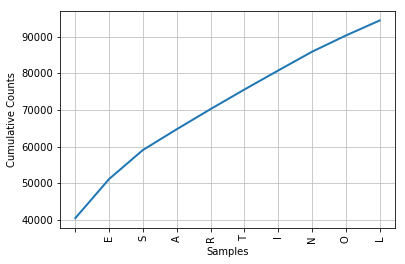

In [6]:
from nltk.book import *
fdist1 = FreqDist(report)
#fdist.most_common(50)
fdist1.plot(10, cumulative=True)

In [7]:
from collections import Counter
words = report.split()
letter_counts = Counter(words)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df

,0
CRANIAL,1
LATER,1
implants,1
INTERISTING,2
DELAY,1
0836,1
sleep,44
WICKETS,1
EXAM&,1
RESPIRATION,1


In [11]:
df = df.sort_values(by=0, ascending=0)
df

,0
SEIZURE,497
PB,486
RANDOM,400
SLOW,318
SZ,296
W,291
SLEEP,287
OF,285
L,284
SEIZURES,268


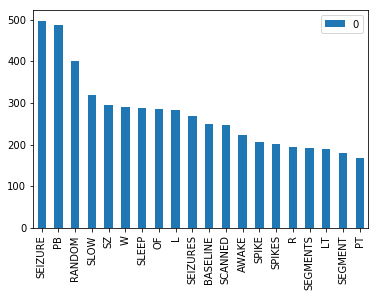

In [10]:
df1 = df[:20]
plt.show(block=True)
df1.plot(kind='bar')

In [12]:
list(bigrams(df))

NameError: name 'bigrams' is not defined